# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [5]:
import pandas as pd

In [ ]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

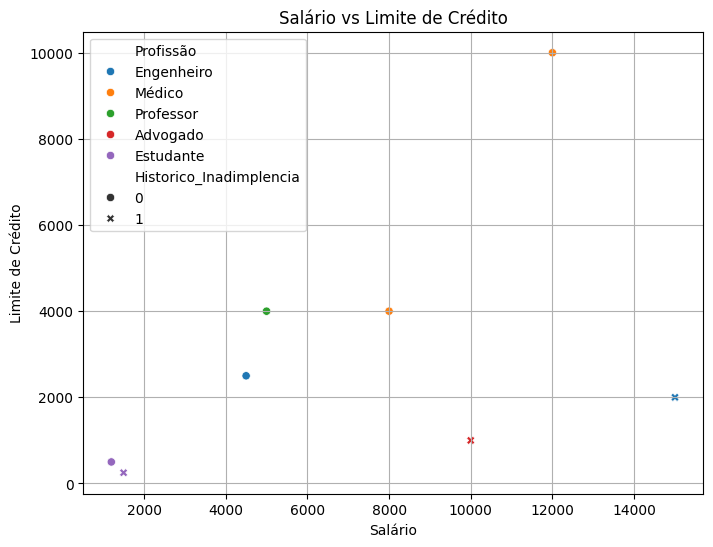

In [16]:
 # 1 - Gráfico de Dispersão: Salário vs Limite de Crédito

import matplotlib.pyplot as plt
import seaborn as sns


df['Salário'] = df['Salário'].astype(float)
df['Limite_Credito'] = df['Limite_Credito'].astype(float)


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Salário', y='Limite_Credito', hue='Profissão', style='Historico_Inadimplencia')
plt.title('Salário vs Limite de Crédito')
plt.xlabel('Salário')
plt.ylabel('Limite de Crédito')
plt.grid(True)
plt.show()


# Por que usar: ajuda a visualizar se há uma correlação entre salário e limite de crédito, e se profissões ou inadimplência impactam.


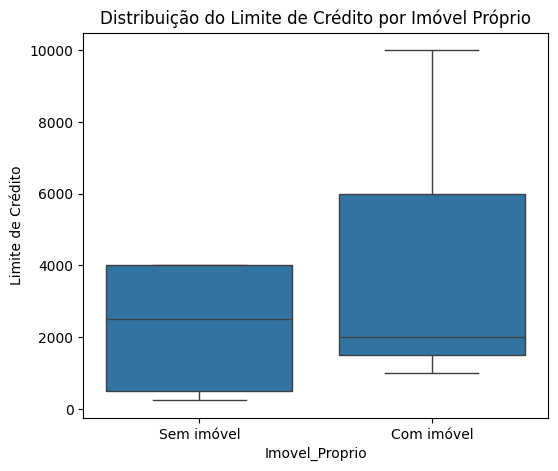

In [14]:
# 2 - Boxplot de Limite de Crédito por Imóvel Próprio

df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)

plt.figure(figsize=(6,5))
sns.boxplot(x='Imovel_Proprio', y='Limite_Credito', data=df)
plt.title('Distribuição do Limite de Crédito por Imóvel Próprio')
plt.xticks([0,1], ['Sem imóvel', 'Com imóvel'])
plt.ylabel('Limite de Crédito')
plt.show()
# Por que usar: mostra se possuir imóvel próprio tende a estar associado a maiores limites.# 2 -

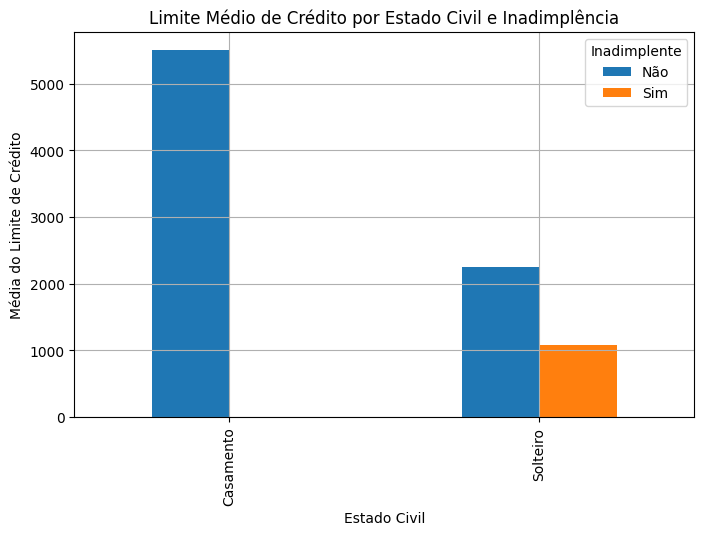

In [15]:
# 3. Gráfico de Barras: Médias de Limite de Crédito por Estado Civil e Histórico de Inadimplência

df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)

grupo = df.groupby(['Estado_Civil', 'Historico_Inadimplencia'])['Limite_Credito'].mean().unstack()
grupo.plot(kind='bar', figsize=(8,5))
plt.title('Limite Médio de Crédito por Estado Civil e Inadimplência')
plt.ylabel('Média do Limite de Crédito')
plt.xlabel('Estado Civil')
plt.legend(title='Inadimplente', labels=['Não', 'Sim'])
plt.grid(True)
plt.show()
# Por que usar: revela como o histórico de inadimplência e estado civil afetam os limites médios.